<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [3]:
# ANSWER
titanic_csv = 'titanic_train.csv'

In [9]:
data = pd.read_csv(titanic_csv)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [26]:
data[data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [30]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find candidate features to predict `Survived`. Get rid of null values. 

In [31]:
# ANSWER

In [33]:
#clean the cabin data first

data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
C87            1
B71            1
B79            1
B86            1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [34]:
#Variation of cabin name is not helping. Remove numbers from Cabin.
data['Cabin'] = data['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)

In [36]:
# Check Cabin
data['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [40]:
data['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

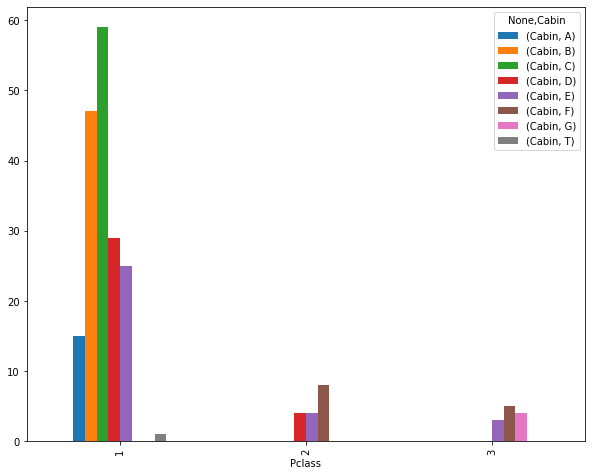

In [41]:
data.groupby(by=['Pclass', 'Cabin']).agg({'Cabin': 'count'}).unstack().plot(kind='bar', figsize=(10,8));

#It's clear from the plot that Cabin A, B, C & T is only available in Pclass 1.

In [42]:
cabin_map = {
    'A': 1
    , 'B': 2
    , 'C': 3
    , 'D': 4
    , 'E': 5
    , 'F': 6
    , 'G': 7
    , 'T': 8
}
data['Cabin'] = data['Cabin'].map(cabin_map)

In [44]:
# Fill Cabin with Mean values
data['Cabin'].fillna(data.groupby(by=['Pclass'])['Cabin'].transform("mean"), inplace=True)

In [45]:
# Remove Decimal Numbers
data['Cabin'] = np.round(data['Cabin'], decimals=0)

In [46]:
# Check Cabin
data['Cabin'].value_counts()

6.0    492
5.0    200
3.0     99
2.0     47
4.0     33
1.0     15
7.0      4
8.0      1
Name: Cabin, dtype: int64

In [48]:
#clean embarked next
data['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [49]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
data['Embarked'].fillna('S', inplace = True) # inplace stores the change in memory
data['Embarked'].isnull().sum()

0

In [58]:
#clean the null values in age
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
data['Age'].isnull().sum()

0

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.318643,13.281103,0.42,21.7500,26.507589,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Cabin,891.0,5.079686,1.342203,1.00,5.0000,6.000000,6.0,8.0000


### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [64]:
# ANSWER

X = data[['Pclass','Parch']]
y= data['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [65]:
# ANSWER

# Create Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [82]:
# ANSWER
# Create Model

LogReg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [83]:
# ANSWER
# Fit Model

reg = LogReg.fit(X_train, y_train)

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [84]:
# ANSWER

reg.coef_

array([[-0.90824213,  0.33432156]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [85]:
# ANSWER

reg.intercept_

array([1.40820621])

We can create tuples of the predictor names and coefficients like this:

In [86]:
feature_cols = ['Pclass','Parch']

In [87]:
# ANSWER
print(set(zip(feature_cols, reg.coef_[0])))

{('Pclass', -0.9082421341469836), ('Parch', 0.334321555147779)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [88]:
for col in zip(X_train.columns, reg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [90]:
# ANSWER

from sklearn.metrics import accuracy_score

y_pred = LogReg.predict(X_train)

accuracy_score(y_train,y_pred)

0.6924157303370787

What is the  `accuracy_score` for the test data?

In [92]:
# ANSWER

y_predtest = LogReg.predict(X_test)

accuracy_score(y_test,y_predtest)

0.6536312849162011

What can we say aout this result?

ANSWER
- ...
- ...

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model

In [0]:
# ANSWER

In [93]:
# Build Model

X = data[['Pclass','Parch','Age']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Fit Model
LogReg = LogisticRegression()
reg1 = LogReg.fit(X_train, y_train)

feature_cols = ['Pclass','Parch','Age']
print(reg1.coef_)
print(reg1.intercept_)

for col in zip(X_train.columns, reg1.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1])) 


# Score
y_pred = LogReg.predict(X_train)

print(accuracy_score(y_train,y_pred))

y_predtest = LogReg.predict(X_test)

print('accuracy_score for the test data', accuracy_score(y_test,y_predtest))

[[-1.23513641  0.22894494 -0.04254208]]
[3.44275889]
Pclass      -1.235136
Parch       +0.228945
Age         -0.042542
0.7134831460674157
accuracy_score for the test data 0.664804469273743


So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- ...
- ...
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [96]:
# ANSWER

from sklearn.metrics import confusion_matrix

y_pred_class = LogReg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[87 19]
 [41 32]]


Nb. Here is how `confusion_matrix` arranges its output:

In [97]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: false negative.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

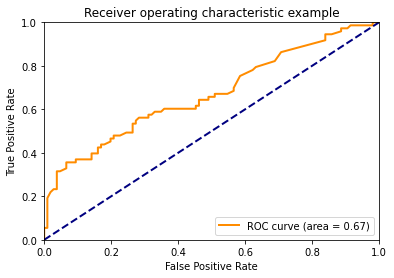

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = LogReg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [182]:
#converting character features into dummy varaibles to include in our model

titanic = pd.read_csv(titanic_csv)

titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [184]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using an expanded set of predictors (age, parents/children, siblings/spouses, class) and compute the accuracy score for the test set:

In [185]:
# ANSWER
# Set Features with both Numerical and the above specified Categorical features

# Build Model

X = titanic_with_dummies[["Age", "Parch", "SibSp","Pclass_1","Pclass_2","Pclass_3"]]
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Fit Model
LogReg = LogisticRegression()
reg2 = LogReg.fit(X_train, y_train)

feature_cols = ["Age", "Parch", "SibSp","Pclass_1","Pclass_2","Pclass_3"]
print(reg2.coef_)
print(reg2.intercept_)

for col in zip(X_train.columns, reg2.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1])) 


# Score
y_pred = LogReg.predict(X_train)

print('accuracy_score for the training data', accuracy_score(y_train,y_pred))

y_predtest = LogReg.predict(X_test)

print('accuracy_score for the test data', accuracy_score(y_test,y_predtest))

[[-0.04495926  0.32980357 -0.2706282   1.14548526  0.13147374 -1.28276135]]
[1.1655834]
Age         -0.044959
Parch       +0.329804
SibSp       -0.270628
Pclass_1    +1.145485
Pclass_2    +0.131474
Pclass_3    -1.282761
accuracy_score for the training data 0.702247191011236
accuracy_score for the test data 0.659217877094972


Plot the ROC curve for the new model:

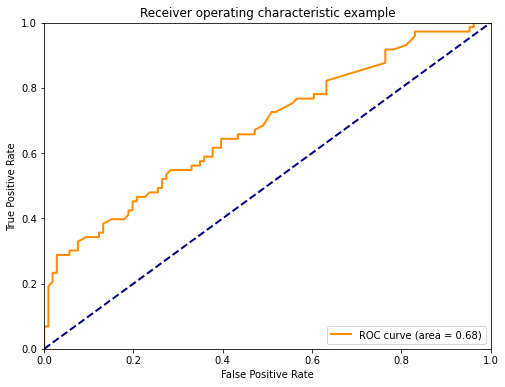

In [172]:
# ANSWER

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = LogReg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [0]:
# ANSWER - No?

## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?  
Tip : consult sklearn cross_val_score

3. Look at the False Positive Rate `FPR` & True Positive Rate `TPR` vectors for the best model.

In [209]:
# ANSWER
# Set Features with both Numerical and the above specified Categorical features

# Build Model

X = titanic_with_dummies[["Age", "Parch", "SibSp","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male"]]
y = titanic_with_dummies['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fit Model
LogReg = LogisticRegression()
reg2 = LogReg.fit(X_train, y_train)

feature_cols = ["Age", "Parch", "SibSp","Pclass_1","Pclass_2","Pclass_3","Sex_female","Sex_male"]
print(reg2.coef_)
print(reg2.intercept_)

for col in zip(X_train.columns, reg2.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))


# Score
y_pred = LogReg.predict(X_train)

print('accuracy_score for the training data', accuracy_score(y_train,y_pred))

y_predtest = LogReg.predict(X_test)

print('accuracy_score for the test data', accuracy_score(y_test,y_predtest))

[[-0.04388324 -0.03282947 -0.40192886  1.20583095 -0.03818855 -1.16981273
   1.30596676 -1.30813709]]
[1.63912134]
Age         -0.043883
Parch       -0.032829
SibSp       -0.401929
Pclass_1    +1.205831
Pclass_2    -0.038189
Pclass_3    -1.169813
Sex_female  +1.305967
Sex_male    -1.308137
accuracy_score for the training data 0.8061797752808989
accuracy_score for the test data 0.8268156424581006


In [211]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predtest,target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       120
           1       0.78      0.66      0.72        59

    accuracy                           0.83       179
   macro avg       0.81      0.78      0.80       179
weighted avg       0.82      0.83      0.82       179



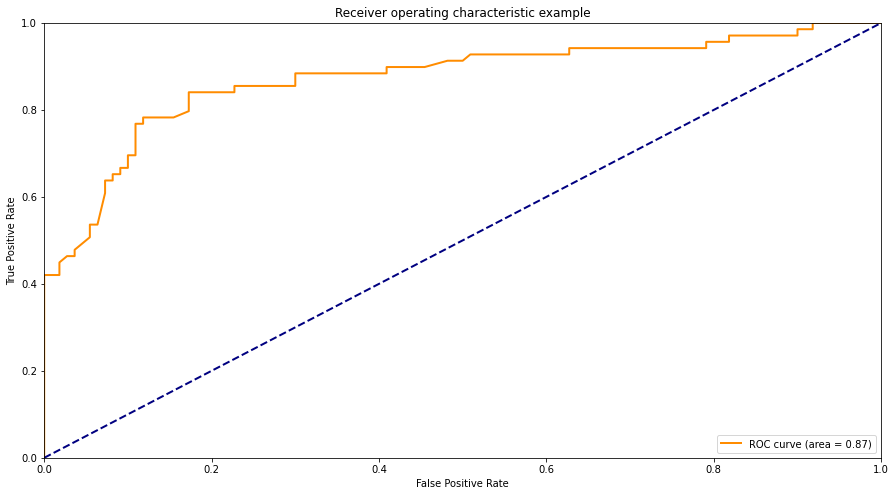

In [206]:
#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = LogReg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [207]:
y_pred_class = LogReg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[97 13]
 [15 54]]




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



